In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.examples import *
from data_reconstruct.utilities import *

In [3]:
random_state = 42
np.random.seed(random_state)

# Load Data

In [4]:
# Read
mod1 = pd.read_csv('data/decennial_2020_nov8GAN.csv')[1:]
mod2 = pd.read_csv('data/public_150k_plus_210630.csv')
mod1_tagged = process_decennial(mod1)
mod2_tagged = process_ppp(mod2)
mod1, mod1_cols, mod1_tags_cols = mod1_tagged
mod2, mod2_cols, mod2_tags_cols = mod2_tagged

# Merge
mod1, mod2, annotations = merge_data(mod1_tagged, mod2_tagged)

# Sample
num_samples = min(mod1.shape[0], 2000)
mod1_sample = mod1.sample(num_samples, random_state=random_state)
mod2_sample = mod2.sample(num_samples, random_state=random_state)
annotations_sample = annotations.sample(num_samples, random_state=random_state);

# Predict Excluded Records

In [5]:
predicted_feature = 0

split_idx = int(.8 * len(mod2_sample))
pipeline_output = run_pipeline(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    train_idx=split_idx,
    output_cols=[predicted_feature],
    embedding_dim=50,
    embedding_kwargs={
        'project_mode': 'tsne',
        'epoch_pd': 4000,
        'log_pd': 200,
        'epoch_DNN': 300,
        'log_DNN': 100,
    },
    hidden_dim=100,
    nn_kwargs={
        'epochs': 300,
        'log_epoch': 100,
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (729, 6)
Dataset 1: (583, 4)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[200/4000] err:0.2488 alpha:0.6991
epoch:[400/4000] err:0.1494 alpha:0.4205
epoch:[600/4000] err:0.1737 alpha:0.4905
epoch:[800/4000] err:0.1948 alpha:0.5524
epoch:[1000/4000] err:0.2126 alpha:0.6064
epoch:[1200/4000] err:0.2273 alpha:0.6532
epoch:[1400/4000] err:0.2392 alpha:0.6937
epoch:[1600/4000] err:0.2486 alpha:0.7289
epoch:[1800/4000] err:0.2557 alpha:0.7596
epoch:[2000/4000] err:0.2609 alpha:0.7866
epoch:[2200/4000] err:0.2643 alpha:0.8107
epoch:[2400/4000] err:0.2661 alpha:0.8324
epoch:[2600/4000] err:0.2666 alpha:0.8524
epoch:[2800/4000] err:0.2658 alpha:0.8711
epoch:[3000/4000] err:0.2640 alpha:0.8888
epoch:[3200/4000] err:0.2613 alpha:0.9059
epoch:[3400/4000] err:0.2579 alpha:0.9221
epoch:[3600/4000] err:0.2543 alpha:0.9374
epoch:[3800/4000] err:0.2506 alpha:0.9515
epoch:[4000/4000] err:0.2

# Evaluate Results

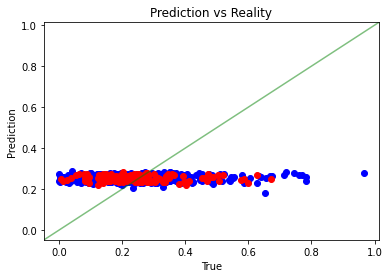

In [6]:
plot_example_results(mod2_sample.iloc[:, predicted_feature], pipeline_output, split_idx)